# 一.加载数据

In [5]:
#1.加载处理数据所需要的库
import pandas as pd  

#2.读取数据文件
# path 文件路径 
df = pd.read_excel('order2019.xlsx',index_col='id')

df.head() #104557

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


# 二.提取数据

# 2.1根据业务需要提取数据,提取2019年数据 

In [12]:
#1.引入时间模块, 确定周期时间
import datetime

#2.确定开始时间节点与结束时间节点 
# 2019，1，1，0，0，0 
startTime = datetime.datetime(2019, 1, 1)
endTime = datetime.datetime(2019, 12, 31, 23, 59, 59)

#3.将数据源中的时间数据转换成datetime形式 
df.orderTime = pd.to_datetime(df.orderTime)
df.payTime = pd.to_datetime(df.payTime)

#4.将2019年1月1日前数据删除
# True False 
df[df.orderTime < startTime] 
#删除数据 drop(index="索引", inplace=True,False) 
df.drop(index=df[df.orderTime < startTime].index, inplace=True)
df

#5.将2019年12月31日后数据删除 
df[df.orderTime > endTime]
df.drop(index=df[df.orderTime > endTime].index, inplace=True)
#print(df.describe())
df.head() #104296 


,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否


# 2.2提取数据时,处理与业务流程不符合数据,支付时间间隔过长 

In [16]:
#1.下单时间与支付时间间隔 
df['payinterval'] = (df.payTime-df.orderTime).dt.total_seconds()
df

#2.支付时间间隔大于30分钟与支付时间早于下单时间 
df[df.payinterval>1800]
df.drop(index=df[df.payinterval>1800].index, inplace=True)
df.drop(index=df[df.payinterval<0].index, inplace=True)
df  #103354 

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payinterval
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.200000,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.040000,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0
8,sys-2019-306447069,user-104863,PR000499,499.41,480.420000,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.950000,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0
10,sys-2019-337079027,user-137939,PR000768,465.41,465.410000,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0
11,sys-2019-417411381,user-181957,PR000483,279.53,279.530000,渠道-0007,APP,2019-01-01 01:36:17,2019-01-01 01:36:56,否,39.0
12,sys-2019-254286596,user-174586,PR000322,622.70,622.700000,渠道-0283,Wech atMP,2019-01-01 01:37:00,2019-01-01 01:37:14,否,14.0
13,sys-2019-303647260,user-178023,PR000685,969.61,913.580000,渠道-0765,APP,2019-01-01 02:11:23,2019-01-01 02:12:56,否,93.0
14,sys-2019-347419495,user-209896,PR000483,279.18,225.150000,渠道-0396,APP,2019-01-01 02:31:13,2019-01-01 02:32:40,否,87.0


# 2.3提取数据时,处理与业务流程不符合数据,订单金额与支付金额为负

In [23]:
# 1.订单金额为负
# df[df.orderAmount < 0] 
# # # 2.付款金额为负 
df[df.payment < 0]
# # # 3.删除相应订单
df.drop(index=df[df.payment < 0].index, inplace=True)
df #103348 

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payinterval
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.200000,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.040000,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0
8,sys-2019-306447069,user-104863,PR000499,499.41,480.420000,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.950000,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0
10,sys-2019-337079027,user-137939,PR000768,465.41,465.410000,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0
11,sys-2019-417411381,user-181957,PR000483,279.53,279.530000,渠道-0007,APP,2019-01-01 01:36:17,2019-01-01 01:36:56,否,39.0
12,sys-2019-254286596,user-174586,PR000322,622.70,622.700000,渠道-0283,Wech atMP,2019-01-01 01:37:00,2019-01-01 01:37:14,否,14.0
13,sys-2019-303647260,user-178023,PR000685,969.61,913.580000,渠道-0765,APP,2019-01-01 02:11:23,2019-01-01 02:12:56,否,93.0
14,sys-2019-347419495,user-209896,PR000483,279.18,225.150000,渠道-0396,APP,2019-01-01 02:31:13,2019-01-01 02:32:40,否,87.0


# 三.清洗数据

# 3.1 查看数据

In [21]:
#1.查看非空信息
df.info()
#2. 查看整体描述
df.describe()

,orderAmount,payment,payinterval
count,103354.000000,103354.000000,103354.000000
mean,1050.083719,1167.852690,59.428711
std,1053.694850,2170.202477,127.255086
min,6.100000,-12.470000,0.000000
25%,432.420000,384.232500,15.000000
50%,680.040000,642.105000,23.000000
75%,1249.512500,1254.815000,46.000000
max,28465.250000,83270.053829,1788.000000


# 3.2 清洗orderID

In [30]:
#1.订单orderID不重复的个数
df.orderID.unique().size 
# # 2.删除重复数据 
df.drop(index=df[df.orderID.duplicated()].index, inplace=True)
df.info() #103321

#df[df.orderID.duplicated()].size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103321 entries, 6 to 104301
Data columns (total 11 columns):
orderID         103321 non-null object
userID          103321 non-null object
goodsID         103321 non-null object
orderAmount     103321 non-null float64
payment         103321 non-null float64
chanelID        103313 non-null object
platformType    103321 non-null object
orderTime       103321 non-null datetime64[ns]
payTime         103321 non-null datetime64[ns]
chargeback      103321 non-null object
payinterval     103321 non-null float64
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 9.5+ MB


# 3.3 清洗userID 

In [31]:
#用户个数 
df.userID.unique().size

78634

# 3.4 清洗goodsID 

In [35]:
#PR000000  商品下架 
df[df.goodsID == 'PR000000'].size
df.drop(index=df[df.goodsID == 'PR000000'].index, inplace=True)
df.info() #103146 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103146 entries, 6 to 104301
Data columns (total 11 columns):
orderID         103146 non-null object
userID          103146 non-null object
goodsID         103146 non-null object
orderAmount     103146 non-null float64
payment         103146 non-null float64
chanelID        103138 non-null object
platformType    103146 non-null object
orderTime       103146 non-null datetime64[ns]
payTime         103146 non-null datetime64[ns]
chargeback      103146 non-null object
payinterval     103146 non-null float64
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 9.4+ MB


# 3.5 清洗chanelID

In [38]:
df.chanelID.mode()[0]

'渠道-0896'

In [40]:
#1.查看chanelID空值
df[df.chanelID.isnull()]
# #2.对空值进行修补   
# value=  inplace 
df['chanelID'].fillna(value=df.chanelID.mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103146 entries, 6 to 104301
Data columns (total 11 columns):
orderID         103146 non-null object
userID          103146 non-null object
goodsID         103146 non-null object
orderAmount     103146 non-null float64
payment         103146 non-null float64
chanelID        103146 non-null object
platformType    103146 non-null object
orderTime       103146 non-null datetime64[ns]
payTime         103146 non-null datetime64[ns]
chargeback      103146 non-null object
payinterval     103146 non-null float64
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 9.4+ MB


# 3.6 清洗platformtype 

In [43]:
#df.platformType.unique().size 
#df.platformType.unique()
# " "字符串，存在空格    "" 空字符串
df['platformType']=df['platformType'].str.replace(" ","")
df.platformType.unique()

array(['WechatMP', 'APP', 'ALiMP', 'WEB', 'WechatShop', 'Wap'],
      dtype=object)

# 3.7 清洗payment 

In [50]:
#1.创建折扣字段 
df['discount'] = (df.payment/df.orderAmount)
df.describe()  

# 200, 200 190
#2.平均折扣
meanDiscount = df[df['discount']<=1].discount.sum() / df[df['discount']<=1].discount.size
meanDiscount 

#3.找到折扣大于1的数据
df[df['discount']>1]
df['payment'] = df['payment'].mask(df['discount']>1,None)
df 
# #4.对折扣大于1的数据进行填补 
df['payment'].fillna(value=df.orderAmount*meanDiscount , inplace=True)
df.info()
df 

# #5.处理折扣 
df['discount'] = round((df.payment/df.orderAmount),2)
df 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103146 entries, 6 to 104301
Data columns (total 12 columns):
orderID         103146 non-null object
userID          103146 non-null object
goodsID         103146 non-null object
orderAmount     103146 non-null float64
payment         103146 non-null float64
chanelID        103146 non-null object
platformType    103146 non-null object
orderTime       103146 non-null datetime64[ns]
payTime         103146 non-null datetime64[ns]
chargeback      103146 non-null object
payinterval     103146 non-null float64
discount        103146 non-null float64
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 10.2+ MB


,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payinterval,discount
id,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.200000,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0,1.00
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.040000,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0,0.97
8,sys-2019-306447069,user-104863,PR000499,499.41,480.420000,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0,0.96
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.950000,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0,0.95
10,sys-2019-337079027,user-137939,PR000768,465.41,465.410000,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0,1.00
11,sys-2019-417411381,user-181957,PR000483,279.53,279.530000,渠道-0007,APP,2019-01-01 01:36:17,2019-01-01 01:36:56,否,39.0,1.00
12,sys-2019-254286596,user-174586,PR000322,622.70,622.700000,渠道-0283,WechatMP,2019-01-01 01:37:00,2019-01-01 01:37:14,否,14.0,1.00
13,sys-2019-303647260,user-178023,PR000685,969.61,913.580000,渠道-0765,APP,2019-01-01 02:11:23,2019-01-01 02:12:56,否,93.0,0.94
14,sys-2019-347419495,user-209896,PR000483,279.18,225.150000,渠道-0396,APP,2019-01-01 02:31:13,2019-01-01 02:32:40,否,87.0,0.81


# 3.8清洗结束 查看数据

In [53]:
df.describe()

,orderAmount,payment,payinterval,discount
count,103146.000000,103146.000000,103146.000000,103146.000000
mean,1050.466247,993.373100,59.438204,0.917957
std,1054.020910,1042.470804,127.309944,0.138318
min,6.100000,0.000000,0.000000,0.000000
25%,432.495000,379.310000,15.000000,0.900000
50%,680.620000,627.890000,23.000000,0.960000
75%,1249.685000,1193.792500,46.000000,1.000000
max,28465.250000,28465.250000,1788.000000,1.000000


# 至此以后,开始分析

# 四.分析数据

# 4.1.分析数据,整体销售情况

In [52]:
#总体概览 
# # 1.销售GMV
# df.orderAmount.sum()/10000  #10835 
# # # 2.成交总和
# df.payment.sum()/10000     #10246 
# # # 3.实际成交额 
# df[df.chargeback=="否"].payment.sum()/10000  # 8879 
# # # 4.订单数量
# df.orderID.unique().size  #103146
# # # 5.退货订单数
# df[df.chargeback=="是"].orderID.size  #13590
# # # 6.退货率 
df[df.chargeback=="是"].orderID.size/df.orderID.unique().size 
# # 7.用户数
# df.userID.unique().size #78525

0.1317549880751556

# 4.2销售情况,各月份GMV\成交额趋势

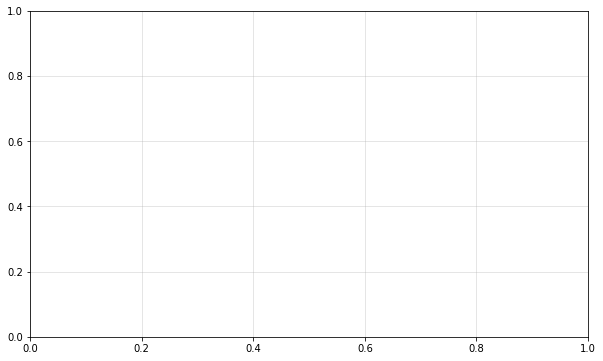

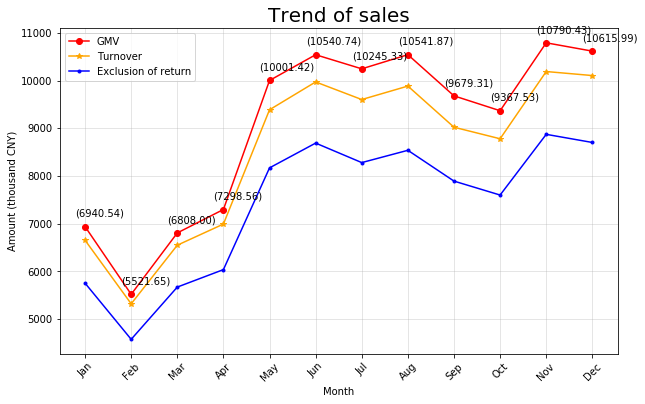

In [59]:
#翻转维度，以月份为坐标轴 
#1.月份字段 
df['month'] = df['orderTime'].dt.month
df

#2.绘制图形b
#2.1引入相应的库
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline 

plt.figure(figsize=(10,6))

plt.grid(alpha=0.4)
x = df.groupby('month')['orderAmount'].sum().index 

y1 = df.groupby('month')['orderAmount'].sum().values/1000

y2 = df.groupby('month')['payment'].sum().values/1000
 
y3 = df[df.chargeback=="否"].groupby('month')['payment'].sum().values/1000

x_ticks_label = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.xticks(x,x_ticks_label,rotation = 45)

plt.plot(x,y1,label='GMV',color="red",marker='o')
plt.plot(x,y2,label='Turnover',color="orange",marker='*')
plt.plot(x,y3,label='Exclusion of return',color="blue",marker = '.')

plt.xlabel('Month')
plt.ylabel("Amount (thousand CNY)")
plt.title('Trend of sales', color='black',size=20)

for a,b in zip(x,y1):
    plt.annotate('(%.2f)'%(b),xy=(a,b),xytext=(-10,10),textcoords='offset points')

plt.legend(loc='upper left')

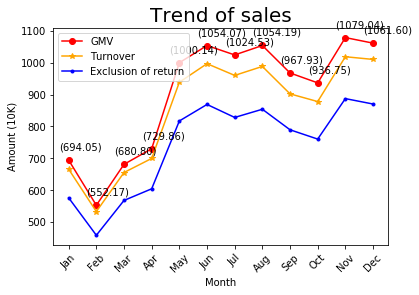

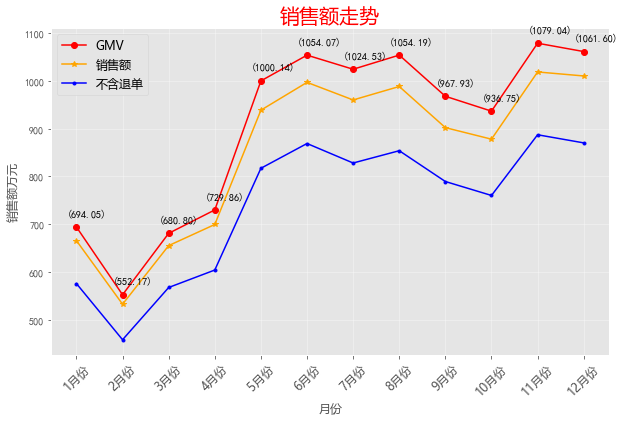

In [67]:
#1.月份字段 
df['month'] = df['orderTime'].dt.month
df

#2.绘制图形
#2.1引入相应的库
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline 

#2.2设置字体
#mac linux  fc-list : lang= zh
my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\msyh.ttc',size=12)

#2.3设置画布大小
plt.figure(figsize=(10,6))

#2.4设置网格线 辅助线 
plt.grid(alpha=0.4)

# #2.5横纵坐标值
# #所有横坐标都一致
x = df.groupby('month')['orderAmount'].sum().index 
x 
# #GMV
y1 = df.groupby('month')['orderAmount'].sum().values/10000
#销售实际付款 
y2 = df.groupby('month')['payment'].sum().values/10000
#不含退单销售额 
y3 = df[df.chargeback=="否"].groupby('month')['payment'].sum().values/10000

#2.6 X横轴坐标文字
x_ticks_label = ["{}月份".format(i) for i in x]
# x刻度，标签文字
plt.xticks(x,x_ticks_label,rotation = 45,fontproperties = my_font)

#2.7绘制三条折线走势
#plot 折线图 
#color 单词，#0022FF rgb(0,255)
plt.plot(x,y1,label='GMV',color="red",marker='o')
plt.plot(x,y2,label='销售额',color="orange",marker='*')
plt.plot(x,y3,label='不含退单',color="blue",marker = '.')

#2.8标记横纵轴名字与标题 
plt.xlabel('月份',fontproperties=my_font)
plt.ylabel("销售额万元",fontproperties=my_font)
plt.title('销售额走势',fontproperties=my_font,color='red',size=20)

#2.9添加折点坐标 
for a,b in zip(x,y1):
    plt.annotate('(%.2f)'%(b),xy=(a,b),xytext=(-10,10),textcoords='offset points')

#2.10设置图例
plt.legend(prop=my_font,loc='upper left')

#2.11显示图形
plt.show()

# 4.3 流量渠道来源分析

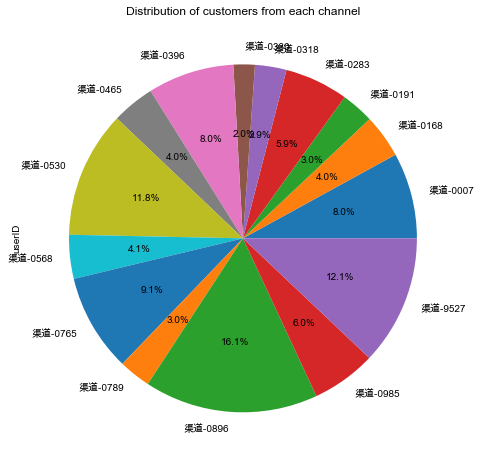

In [65]:
#1.按照渠道分组聚合，统计用户数
custom = df.groupby('chanelID')['userID'].count()
#2.设置字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#3.使用pandas中方法直接画图
#pandas  %  1.1f%  % 
custom.plot.pie(figsize=(12,8),labels=custom.index,autopct="%1.1f%%")
#4.设置标题
plt.title('Distribution of customers from each channel') 
plt.savefig('t2.png')

# 4.4 用户行为, 研究周一到周日哪天订单量最高

In [70]:
#1.处理周几字段
df['dayofweek'] = df['orderTime'].dt.dayofweek
#df['dayofweek'].unique()
#df

#2.引入numpy   
import numpy as np

#3.按周几做聚合
week = df.groupby('dayofweek')['orderID'].count()
week

dayofweek
0    16516
1    16491
2    14424
3    13118
4    13094
5    14271
6    15232
Name: orderID, dtype: int64

In [71]:
week.values

array([16516, 16491, 14424, 13118, 13094, 14271, 15232])

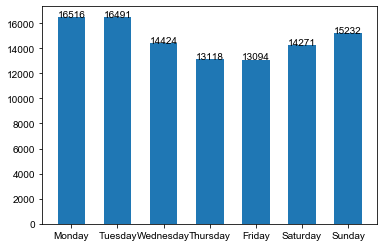

In [73]:
#1.处理周几字段
df['dayofweek'] = df['orderTime'].dt.dayofweek
#df['dayofweek'].unique()
#df

#2.引入numpy   
import numpy as np

#3.按周几做聚合
week = df.groupby('dayofweek')['orderID'].count()
week

# #4.设置横纵坐标
weekX = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekY = week.values

# weekX
# #5.设置X轴
#plt.xticks(range(len(weekX)),weekX,fontproperties=my_font) 
plt.xticks(range(len(weekX)),weekX) 

# #6.设置条形图
rects = plt.bar(range(len(weekX)),weekY,width=0.6) 

#7.设置每个数据条的位置
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.5, str(height),ha="center")
    
#8.显示
plt.show()

# 4.5 用户行为, 哪个时间段下单量最高

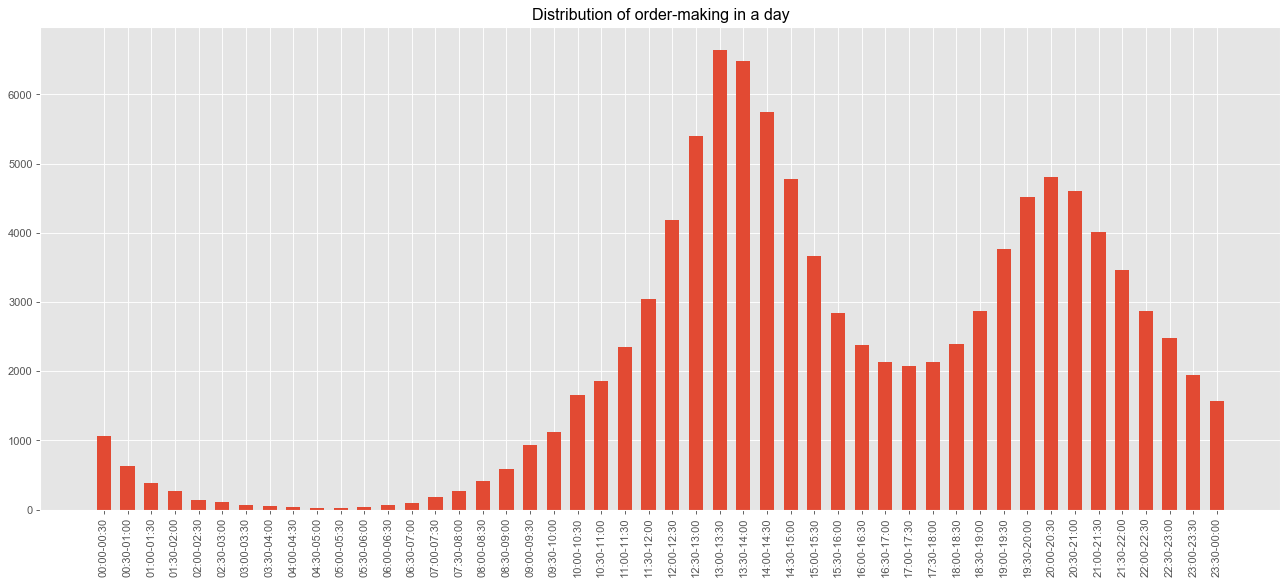

In [81]:
#1.备份整个数据 
df1 = df.copy()
# df1 = df

#2.设置时间周期30min
s = df1['orderTime'].dt.floor('30T')
s

#3.将下单时间转换成时间段
df1['orderTime'] = s.dt.strftime('%H:%M') + '-' + (s + pd.Timedelta(30 * 60, unit='s')).dt.strftime('%H:%M')
df1
# #4.根据时间段分组聚合
timedf = df1.groupby('orderTime')['orderID'].count()
timedf
timedfX = timedf.index
timedfY = timedf.values
timedfY

#5.设置画布大小
plt.figure(figsize=(20,8),dpi=80)

#6.设置样式风格
plt.style.use('ggplot')

#7.X轴形式
plt.xticks(range(len(timedfX)),timedfX,rotation=90) 

#8.绘制数据条形图
rect = plt.bar(timedfX,timedfY,width=0.6) 
plt.title('Distribution of order-making in a day') 
plt.savefig('t3.png')

# 4.6用户行为,客户情况 

In [74]:
#1.客单价 
df.orderAmount.sum()/df.userID.unique().size 

1379.8330665393187

In [87]:
#1.检查数据字段
df['userid'] = df["userID"].str[0:4] 
df['userid'].unique()

#2.userID只保留数字
df['userID'] = df["userID"].str[5:] 
df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payinterval,discount,month,dayofweek,userid
id,,,,,,,,,,,,,,,
6,sys-2019-279103297,146548,PR000564,425.20,425.200000,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0,1.00,1,1,user
7,sys-2019-316686066,104210,PR000709,1764.37,1707.040000,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0,0.97,1,1,user
8,sys-2019-306447069,104863,PR000499,499.41,480.420000,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0,0.96,1,1,user
9,sys-2019-290267674,206155,PR000253,1103.00,1050.950000,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0,0.95,1,1,user
10,sys-2019-337079027,137939,PR000768,465.41,465.410000,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0,1.00,1,1,user
11,sys-2019-417411381,181957,PR000483,279.53,279.530000,渠道-0007,APP,2019-01-01 01:36:17,2019-01-01 01:36:56,否,39.0,1.00,1,1,user
12,sys-2019-254286596,174586,PR000322,622.70,622.700000,渠道-0283,WechatMP,2019-01-01 01:37:00,2019-01-01 01:37:14,否,14.0,1.00,1,1,user
13,sys-2019-303647260,178023,PR000685,969.61,913.580000,渠道-0765,APP,2019-01-01 02:11:23,2019-01-01 02:12:56,否,93.0,0.94,1,1,user
14,sys-2019-347419495,209896,PR000483,279.18,225.150000,渠道-0396,APP,2019-01-01 02:31:13,2019-01-01 02:32:40,否,87.0,0.81,1,1,user


# 4.7用户行为,客户复购率 

In [88]:
# 分析复购率
# 将用户消费数据进行数据透视。
# 统计每个用户在每月的订单量，所以userID是index，month是column。
pivoted_counts=df.pivot_table(index='userID',columns='month',
                             values='orderTime',aggfunc='count').fillna(0)
pivoted_counts.head()


month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100003,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
100007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


month
1     114.0
2      55.0
3     100.0
4     131.0
5     286.0
6     316.0
7     235.0
8     290.0
9     225.0
10    241.0
11    311.0
12    320.0
dtype: float64
month
1      6229
2      4900
3      5790
4      6473
5      9348
6     10335
7      9316
8      9241
9      9124
10     8698
11    10663
12    10356
dtype: int64


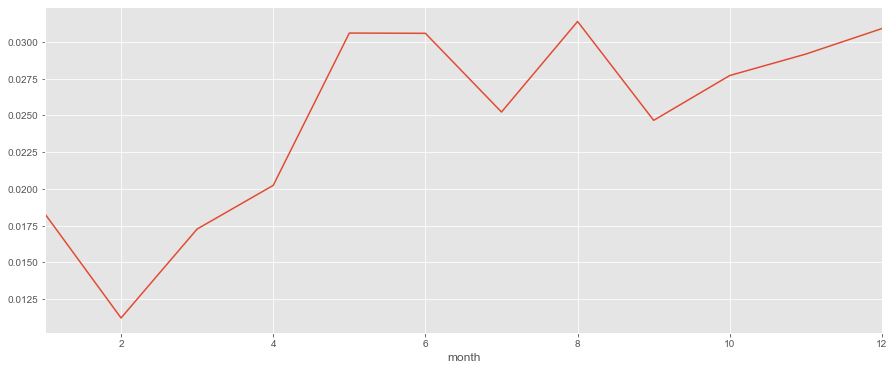

In [91]:
#复购率
# 复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比。这里的时间窗口是月。

# if x>1 :
#     x = 1 
# else :
#    if x==0:
#     np.NaN 
#    else :
#      0

#1.引入numpy 
import numpy as np

#2. 将数据转换一下，消费两次及以上记为1，消费一次记为0，没有消费记为NaN。
pcRepeatBuy =pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pcRepeatBuy

print(pcRepeatBuy.sum())
print(pcRepeatBuy.count())
# #3.绘图
# #用sum和count相除即可计算出复购率。count是总的消费用户数，sum是两次以上的消费用户数。
(pcRepeatBuy.sum()/pcRepeatBuy.count()).plot(figsize=(15,6))


plt.savefig('t4.png')

# 4.8用户行为,客户RFM模型

In [95]:
#RFM根据用户的活跃程度，频率，贡献程度 分类

# Recency   最后一次消费距离现在时间距离       R越小越好， 
# Frequency  消费频率                    F越大越好
# Monetary  消费金额                     M越大越好
# 8类用户， 打标签

#1.备份整个数据 
customdf = df.copy() 

#2.删除退单
customdf.drop(index=df[df.chargeback == '是'].index, inplace=True)
customdf 

#3.转换日期格式
customdf['orderTime'] = customdf['orderTime'].dt.date
# customdf['orderTime'] = pd.to_datetime(customdf['orderTime'], format='%Y-%m-%d') 
customdf

#4.将userID设置为索引
customdf.set_index('userID',drop=True,inplace=True)  

#5.将原始订单中订单量全部置为1 
customdf['orders'] = 1 
customdf

#6.数据透视
rfmdf = customdf.pivot_table(index=['userID'],
                    values=['orderAmount','orderTime','orders'],
                    aggfunc={'orderTime':'max',
                            'orderAmount':'sum',
                            'orders':'sum'})



#7.处理RFM模型中的R
rfmdf['R'] = (rfmdf.orderTime.max()-rfmdf.orderTime).dt.days

#8.处理RFM模型中的F与M
rfmdf.rename(columns={'orderAmount':'M','orders':'F'},inplace=True)
rfmdf.head()

,M,orderTime,F,R
userID,,,,
100000,1978.47,2019-10-13,1,79
100003,521.60,2019-05-24,1,221
100006,466.89,2019-11-14,1,47
100007,2178.20,2019-01-14,1,351
100008,4949.65,2019-11-16,1,45


In [97]:

def rfm_func(x):
    level = x.apply(lambda x: "1" if x >= 1 else '0')
    label = level.R + level.F + level.M
    d = {
        '011':'VIP Customers',
        '111':'Recall Required Customers',
        '001':'Deep Work Required Customers',
        '101':'Important Leaving Customers',
        '010':'Potential Customers',
        '110':'Ordinary Customers',
        '000':'New Customers',
        '100':'Lost Customers'
    }
    result = d[label]
    return result

#2.根据模型打标签
rfmdf['label'] = rfmdf[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)

#3.分组聚合
rfmdf_res = rfmdf.groupby('label').count()
rfmdf_res

,M,orderTime,F,R
label,,,,
Deep Work Required Customers,11547,11547,11547,11547
Important Leaving Customers,9129,9129,9129,9129
Lost Customers,23498,23498,23498,23498
New Customers,23598,23598,23598,23598
Ordinary Customers,29,29,29,29
Potential Customers,165,165,165,165
Recall Required Customers,352,352,352,352
VIP Customers,2175,2175,2175,2175


In [80]:
#1. 对用户分类，设置标签
def rfm_func(x):
    level = x.apply(lambda x: "1" if x >= 1 else '0')
    label = level.R + level.F + level.M
    d = {
        '011':'重要价值客户',
        '111':'重要唤回客户',
        '001':'重要深耕客户',
        '101':'重要挽留客户',
        '010':'潜力客户',
        '110':'一般维持客户',
        '000':'新客户',
        '100':'流失客户'
    }
    result = d[label]
    return result

#2.根据模型打标签
rfmdf['label'] = rfmdf[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)

#3.分组聚合
rfmdf_res = rfmdf.groupby('label').count()
rfmdf_res

,M,orderTime,F,R
label,,,,
一般维持客户,29,29,29,29
新客户,23598,23598,23598,23598
流失客户,23498,23498,23498,23498
潜力客户,165,165,165,165
重要价值客户,2175,2175,2175,2175
重要唤回客户,352,352,352,352
重要挽留客户,9129,9129,9129,9129
重要深耕客户,11547,11547,11547,11547


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

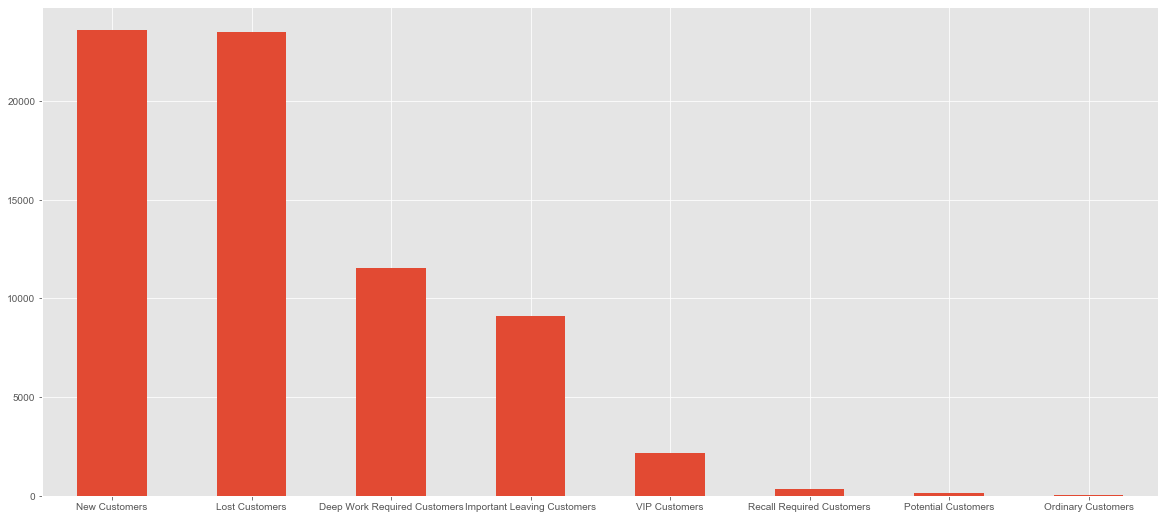

In [98]:
#1.绘制图形
rfmdf.label.value_counts().plot.bar(figsize=(20,9))
#2.设置X轴
plt.xticks(rotation=0,fontproperties=my_font)